In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

sns.set_theme(style="whitegrid")

data = {'Task': [], 'Method': [], 'Occupancy Count':[]}
csvfiles = os.listdir('csvfiles')
for csvfile in csvfiles:
    df_temp = pd.read_csv('csvfiles/' + csvfile)
    

    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav (6v0)'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep (4v2)'

    occupancy_count = df_temp.Value.iloc[49].item()

    data['Task'].append(task)
    data['Method'].append(method)
    data['Occupancy Count'].append(occupancy_count)
df = pd.DataFrame(data).sort_values(by=['Task', 'Method'],ascending=False, ignore_index=True)


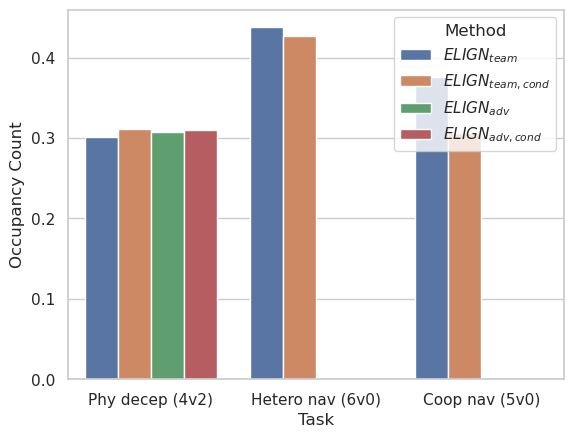

In [8]:
sns.barplot(data=df, x="Task", y="Occupancy Count", hue="Method")
plt.show()

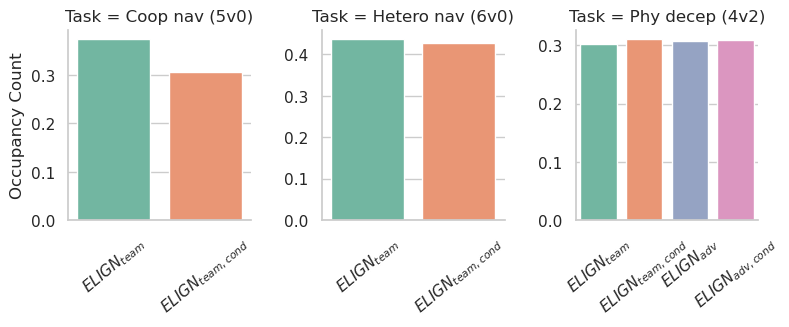

In [9]:
g = sns.catplot(x="Method", y="Occupancy Count", hue="Method", col='Task', data=df, kind="bar",
                height=3, aspect=0.9, col_order=['Coop nav (5v0)','Hetero nav (6v0)','Phy decep (4v2)'], 
                palette=sns.color_palette("Set2"), sharey=False, sharex=False, dodge=False);
g.set_xticklabels(rotation=40)
g.set(xlabel=None)
plt.savefig('figures/occupancy_count.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()